In [150]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

DATA_PATH = './data/'
MODEL_PATH = './weights/'
%matplotlib inline

In [151]:
# Parameters
objectnessThreshold = 0.5 # Objectness threshold
confThreshold = 0.5       # Confidence threshold
nmsThreshold = 0.4        # Non-maximum suppression threshold
inpWidth = 416            # Width of network's input image
inpHeight = 416           # Height of network's input image

In [152]:
# Load names of classes
classesFile = MODEL_PATH + "coco.names"
classes = None

with open(classesFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

# Give the configuration and weight files for the model and load the network using them.
modelConfiguration = MODEL_PATH + "yolov3.cfg"
modelWeights = MODEL_PATH + "yolov3.weights"

net = cv2.dnn.readNetFromDarknet(modelConfiguration, modelWeights)

In [153]:
dir(net)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'connect',
 'dump',
 'dumpToFile',
 'empty',
 'enableFusion',
 'forward',
 'forwardAndRetrieve',
 'forwardAsync',
 'getFLOPS',
 'getLayer',
 'getLayerId',
 'getLayerNames',
 'getLayerTypes',
 'getLayersCount',
 'getLayersShapes',
 'getMemoryConsumption',
 'getParam',
 'getPerfProfile',
 'getUnconnectedOutLayers',
 'getUnconnectedOutLayersNames',
 'readFromModelOptimizer',
 'setHalideScheduler',
 'setInput',
 'setInputShape',
 'setInputsNames',
 'setParam',
 'setPreferableBackend',
 'setPreferableTarget']

In [154]:
# Unconnected Layer IDs with Output
net.getUnconnectedOutLayers()

array([[200],
       [227],
       [254]], dtype=int32)

In [155]:
# Unconnected Layer Names with Output
net.getUnconnectedOutLayersNames()

['yolo_82', 'yolo_94', 'yolo_106']

In [156]:
# get the name by ID
net.getLayerId('yolo_94')

227

In [157]:
# How many layers
len(net.getLayerNames())

254

In [158]:
net.getLayerNames()[200 - 1]

'yolo_82'

In [159]:
# Get the names of the output layers
def getOutputsNames(net):
    
    # Get the names of all the layers in the network
    layersNames = net.getLayerNames()
    
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]

getOutputsNames(net)

['yolo_82', 'yolo_94', 'yolo_106']

In [160]:
### EXAMPLE

# Process inputs
imagePath = DATA_PATH + 'bird.jpg'
frame = cv2.imread(imagePath)


# Create a 4D blob from a frame.
blob = cv2.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], 1, crop=False)

# # Sets the input to the network
net.setInput(blob)

# # Runs the forward pass to get output of the output layers
outs = net.forward(net.getUnconnectedOutLayersNames())
# #outs = net.forward()
 
# print(len(outs))       # 3
# print(len(outs[0]))    # 507
# print(len(outs[0][0])) # 85 # [x, y, w, h, c, person, ...]


classIds = []
confidences = []
boxes = []

frameHeight = frame.shape[0]
frameWidth = frame.shape[1]

for i, out in enumerate(outs):
    for j, detection in enumerate(out):
        if detection[4] > objectnessThreshold:
            scores = detection[5:]
            classId = np.argmax(scores)
            confidence = scores[classId]
            if confidence > confThreshold:
                print(i, j)
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                classIds.append(classId)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])

0 177
0 183
0 201
0 243
0 244
0 246
0 252
0 253
0 256
1 494
1 629
1 683
1 707
1 758
1 761
1 768
1 770
1 839
1 872
1 875
1 953
1 959
1 962
1 974
1 977
1 1040
1 1052
1 1055


In [162]:
outs[0][177]

array([0.55966634, 0.3441246 , 0.2489098 , 0.21040843, 0.90830773,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.9076088 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [163]:
classIds

[14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14]

In [164]:
classes[14]

'bird'

In [165]:
confidences

[0.9076088070869446,
 0.542610228061676,
 0.6043044924736023,
 0.8642199039459229,
 0.5820050835609436,
 0.7659085988998413,
 0.9645405411720276,
 0.8922742605209351,
 0.7983028888702393,
 0.5750319957733154,
 0.5461289286613464,
 0.8967641592025757,
 0.7926357984542847,
 0.7903100252151489,
 0.9992917776107788,
 0.8223521113395691,
 0.6083801984786987,
 0.5907261371612549,
 0.611323893070221,
 0.664050281047821,
 0.5476163625717163,
 0.5859884023666382,
 0.9827412962913513,
 0.8436017632484436,
 0.5630937218666077,
 0.5889726877212524,
 0.76478511095047,
 0.7129231095314026]

In [166]:
print(len(boxes))
boxes

28


[[435, 132, 248, 117],
 [628, 126, 208, 154],
 [71, 179, 236, 120],
 [149, 187, 267, 169],
 [119, 170, 314, 198],
 [200, 182, 246, 182],
 [380, 185, 272, 174],
 [360, 161, 322, 217],
 [404, 155, 286, 225],
 [260, 88, 140, 109],
 [8, 118, 98, 142],
 [667, 111, 165, 158],
 [6, 119, 96, 155],
 [654, 124, 146, 158],
 [670, 123, 160, 159],
 [838, 124, 67, 153],
 [826, 125, 87, 151],
 [667, 134, 159, 162],
 [94, 167, 179, 159],
 [117, 179, 166, 140],
 [113, 180, 177, 163],
 [210, 169, 181, 199],
 [226, 171, 189, 200],
 [398, 187, 184, 166],
 [415, 189, 182, 163],
 [229, 185, 186, 192],
 [399, 191, 187, 181],
 [406, 195, 200, 175]]

In [167]:
indices = [i[0] for i in cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)]
indices

[14, 22, 6, 0, 15, 12, 19, 9]

In [168]:
print(classIds[indices[0]])
print(classes[classIds[indices[0]]])
print(confidences[indices[0]])
print('%.2f' % confidences[indices[0]])
print(boxes[indices[0]])

14
bird
0.9992917776107788
1.00
[670, 123, 160, 159]


In [171]:
for i in indices:
    
    x, y, w, h = boxes[i]

    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 178, 50), 3)
    
    label = '%.2f' % confidences[i]
        
    # Get the label for the class name and its confidence
    if classes:
        assert(classId < len(classes))
        label = '%s:%s' % (classes[classId], label)

    #Display the label at the top of the bounding box
    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(y, labelSize[1])
    
    cv2.rectangle(frame, (x, y - round(1.5*labelSize[1])), (x + round(1.5*labelSize[0]), y + baseLine), (255, 255, 255), cv2.FILLED)
    cv2.putText(frame, label, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 1)

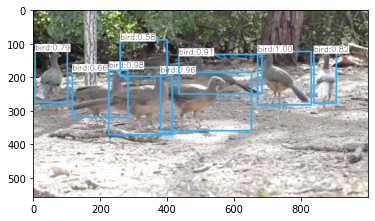

In [172]:
plt.imshow(frame[...,::-1])
plt.show()